In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Understanding The Data 

In [3]:
data = pd.read_csv("final.csv")

In [4]:
data.shape

(4380, 9)

In [5]:
data.head()

,PLACE,QV2M,PRECTOTCORR,T2M,T2M_MAX,T2M_MIN,PS,WS10M,Date
0,Houston,4.21,0.01,6.12,12.09,2.48,101.01,4.23,2021-01-01
1,Houston,4.39,0.00,6.72,13.69,1.30,101.63,2.86,2021-01-02
2,Houston,5.92,0.00,9.64,18.37,2.63,101.38,3.39,2021-01-03
3,Houston,7.51,0.01,13.35,21.73,6.75,101.26,2.42,2021-01-04
4,Houston,6.65,0.01,12.09,19.99,5.85,101.36,3.15,2021-01-05


In [6]:
data.rename(columns={'PLACE':'CITY','QV2M': 'SH2M', 'PRECTOTCORR': 'Precipitation',"PS":"SP"}, inplace=True)


In [7]:
data.columns

Index(['CITY', 'SH2M', 'Precipitation', 'T2M', 'T2M_MAX', 'T2M_MIN', 'SP',
       'WS10M', 'Date'],
      dtype='object')

In [9]:
data.sample(5)

,CITY,SH2M,Precipitation,T2M,T2M_MAX,T2M_MIN,SP,WS10M,Date
495,Houston,14.40,0.00,27.11,35.44,20.62,101.25,3.52,2022-05-11
1065,Houston,10.25,4.84,15.78,20.77,11.31,100.76,2.91,2023-12-02
3146,Pune,16.72,2.98,23.03,26.46,20.95,93.86,4.79,2023-08-15
3669,Ambala,7.02,0.79,12.02,16.70,8.66,96.22,1.77,2022-01-20
1641,London,7.39,0.40,15.98,21.76,10.18,100.54,4.95,2022-07-01


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CITY           4380 non-null   object 
 1   SH2M           4380 non-null   float64
 2   Precipitation  4380 non-null   float64
 3   T2M            4380 non-null   float64
 4   T2M_MAX        4380 non-null   float64
 5   T2M_MIN        4380 non-null   float64
 6   SP             4380 non-null   float64
 7   WS10M          4380 non-null   float64
 8   Date           4380 non-null   object 
dtypes: float64(7), object(2)
memory usage: 308.1+ KB


In [29]:
data['Date'] = pd.to_datetime(data['Date'])
# data.info()

In [11]:
data.describe()# having mathematical insight of data

,SH2M,Precipitation,T2M,T2M_MAX,T2M_MIN,SP,WS10M
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,10.876500,3.674525,19.905932,25.689011,15.071050,97.842973,3.719160
std,5.038555,9.114939,8.172533,9.030417,7.886372,3.081943,1.730225
min,1.100000,0.000000,-6.840000,-3.560000,-10.690000,92.840000,0.660000
25%,6.590000,0.000000,14.230000,20.460000,9.080000,94.642500,2.490000
50%,9.830000,0.220000,21.195000,26.895000,15.605000,97.155000,3.285000
75%,15.440000,2.912500,26.230000,31.822500,21.902500,100.822500,4.520000
max,22.580000,136.260000,37.430000,44.690000,30.650000,103.280000,13.060000


In [12]:
data.isnull().sum() #total null values column-wise

CITY             0
SH2M             0
Precipitation    0
T2M              0
T2M_MAX          0
T2M_MIN          0
SP               0
WS10M            0
Date             0
dtype: int64

In [13]:
# data.describe() 

In [45]:
data.duplicated().sum() # for finding duplicate values

0

In [14]:
data.corr(numeric_only=True)

,SH2M,Precipitation,T2M,T2M_MAX,T2M_MIN,SP,WS10M
SH2M,1.000000,0.382608,0.706687,0.561851,0.809836,-0.355321,-0.141592
Precipitation,0.382608,1.000000,0.113434,-0.005995,0.221453,-0.208763,0.233536
T2M,0.706687,0.113434,1.000000,0.971046,0.969975,-0.467958,-0.297133
T2M_MAX,0.561851,-0.005995,0.971046,1.000000,0.892706,-0.438901,-0.356310
T2M_MIN,0.809836,0.221453,0.969975,0.892706,1.000000,-0.498302,-0.234689
SP,-0.355321,-0.208763,-0.467958,-0.438901,-0.498302,1.000000,0.065549
WS10M,-0.141592,0.233536,-0.297133,-0.356310,-0.234689,0.065549,1.000000


In [15]:
grouped = data.groupby('CITY')

In [16]:
group_mean = grouped.mean(numeric_only=True)
group_mean

,SH2M,Precipitation,T2M,T2M_MAX,T2M_MIN,SP,WS10M
CITY,,,,,,,
Ambala,10.998155,3.908457,23.571251,29.873470,18.545534,96.021753,2.919790
Houston,12.057744,2.693763,21.380155,27.838119,15.900977,101.029808,3.276292
London,6.984466,2.087626,10.958493,15.306868,6.839991,100.454795,4.874922
Pune,13.465635,6.008256,23.713826,29.737589,18.997699,93.865534,3.805635


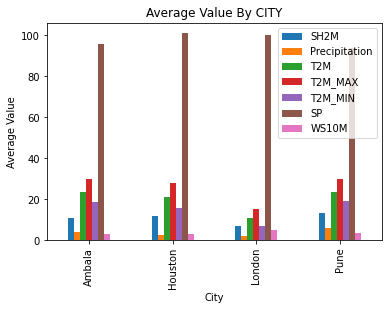

In [56]:
group_mean.plot(kind='bar')
plt.title('Average Value By CITY')
plt.xlabel('City')
plt.ylabel('Average Value')
plt.show()

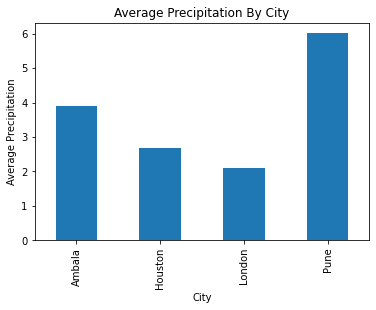

In [61]:
grouped["Precipitation"].mean(numeric_only=True).plot(kind='bar')
plt.title('Average Precipitation By City')
plt.xlabel('City')
plt.ylabel('Average Precipitation')
plt.show()

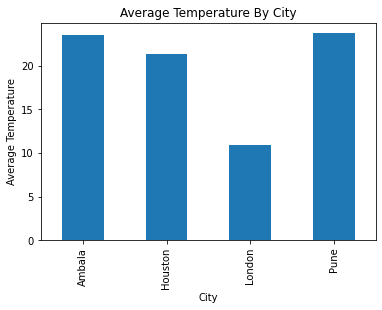

In [62]:
grouped["T2M"].mean(numeric_only=True).plot(kind='bar')
plt.title('Average Temperature By City')
plt.xlabel('City')
plt.ylabel('Average Temperature')
plt.show()

In [25]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have already grouped your data by CITYs
# # Let's say your grouped data is stored in a variable called 'grouped_data'

# # Define the columns you want to compare
# columns_to_compare = ['T2M', 'PRECTOTCORR', 'WS10M', 'T2M_MAX', 'T2M_MIN', 'PS', 'QV2M']

# # Define the type of plots for each comparison
# plot_types = {
#     'T2M': 'line',
#     'PRECTOTCORR': 'line',
#     'WS10M': 'scatter',
#     'T2M_MAX': 'line',
#     'T2M_MIN': 'line',
#     'PS': 'scatter',
#     'QV2M': 'scatter'
# }

# # Loop through each column and create separate plots for each group
# for column in columns_to_compare:
#     plot_type = plot_types[column]
#     for CITY, group_data in grouped_data:
#         plt.figure()
#         if plot_type == 'line':
#             group_data.plot(x='Date', y=column, title=f'{column} for {CITY}')
#             plt.xlabel('Date')
#             plt.ylabel(column)
#         elif plot_type == 'scatter':
#             group_data.plot(kind='scatter', x=column, y='Date', title=f'{column} vs. Date for {CITY}')
#             plt.xlabel(column)
#             plt.ylabel('Date')
#         plt.show()


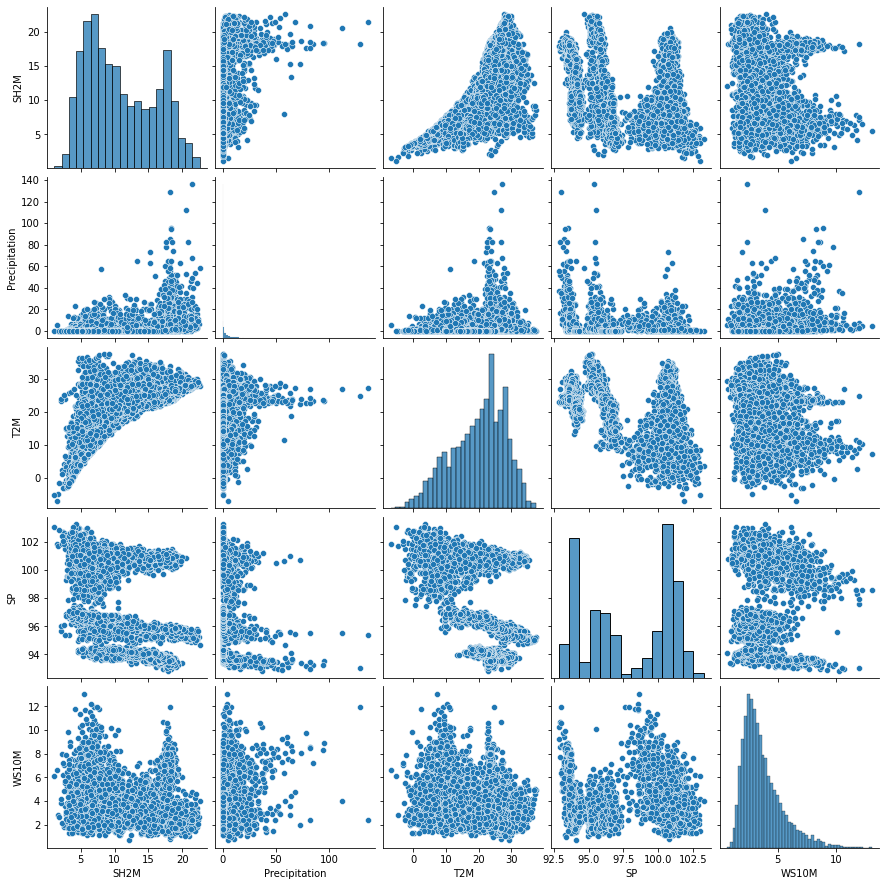

In [17]:
sns.pairplot(data = data ,vars=['SH2M', 'Precipitation', 'T2M', 'SP',
       'WS10M', ])

## Yearly Comparisions

In [30]:
grouped_data = data.groupby([ 'CITY',pd.to_datetime(data['Date']).dt.year])

In [19]:
grouped_data.mean(numeric_only=True)

SH2M  Precipitation        T2M    T2M_MAX    T2M_MIN  \
CITY    Date                                                              
Ambala  2021  10.525342       3.377507  23.742849  30.276110  18.477918   
        2022  11.159616       3.983616  23.765644  29.885315  18.821671   
        2023  11.309507       4.364247  23.205260  29.458986  18.337014   
Houston 2021  12.589479       3.070137  20.726164  26.655014  15.691836   
        2022  11.378137       2.242247  21.312575  28.337534  15.372658   
        2023  12.205616       2.768904  22.101726  28.521808  16.638438   
London  2021   6.881781       2.047644  10.165699  14.288548   6.174603   
        2022   6.849205       1.771973  11.568137  16.259397   7.171836   
        2023   7.222411       2.443260  11.141644  15.372658   7.173534   
Pune    2021  13.954795       6.642356  23.780027  29.388822  19.341151   
        2022  13.286329       6.091562  23.497781  29.683370  18.740685   
        2023  13.155781       5.290849  23.863671  30.140575  18.911260   

                      SP     WS10M  
CITY    Date                        
Ambala  2021   96.007315  2.908849  
        2022   95.950658  2.979342  
        2023   96.107288  2.871178  
Houston 2021  101.040740  3.204932  
        2022  101.072329  3.419315  
        2023  100.976356  3.204630  
London  2021  100.515425  4.744849  
        2022  100.553918  4.848329  
        2023  100.295041  5.031589  
Pune    2021   93.824548  3.562082  
        2022   93.816110  3.887507  
        2023   93.955945  3.967315

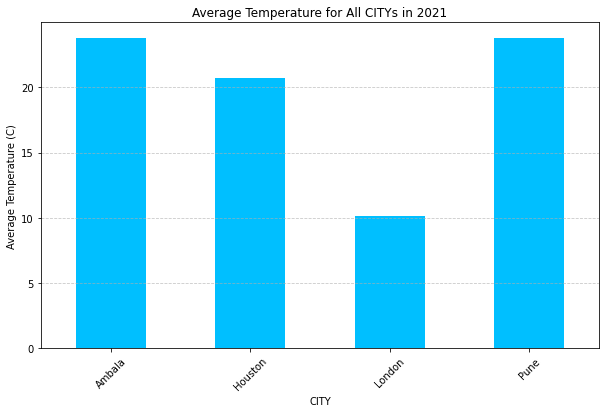

In [32]:
# Filter the grouped data for the year 2021
# grouped_data_2021 = grouped_data.filter(lambda x: x['Year'].iloc[0] == 2021)
grouped_data_2021 = grouped_data.filter(lambda x: pd.to_datetime(x['Date']).dt.year.iloc[0] == 2021)


# Calculate the mean temperature for each CITY in 2021
mean_temp_2021 = grouped_data_2021.groupby('CITY')['T2M'].mean()

# Plot the mean temperature for all four CITYs
plt.figure(figsize=(10, 6))
mean_temp_2021.plot(kind='bar', color='deepskyblue')
plt.title('Average Temperature for All CITYs in 2021')
plt.xlabel('CITY')
plt.ylabel('Average Temperature (C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


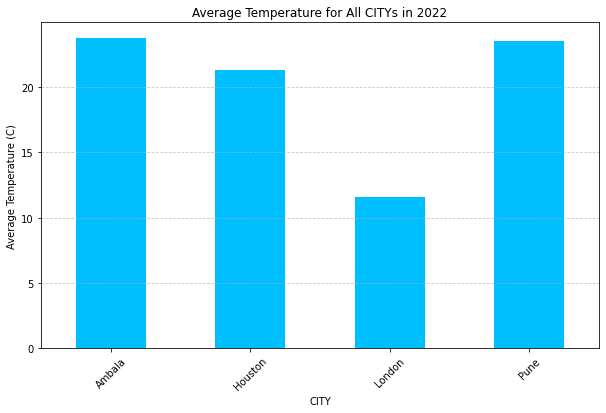

In [25]:

# Filter the grouped data for the year 2021
grouped_data_2022 = grouped_data.filter(lambda x: pd.to_datetime(x['Date']).dt.year.iloc[0] == 2022)

# Calculate the mean temperature for each CITY in 2021
mean_temp_2022 = grouped_data_2022.groupby('CITY')['T2M'].mean()

# Plot the mean temperature for all four CITYs
plt.figure(figsize=(10, 6))
mean_temp_2022.plot(kind='bar', color='deepskyblue')
plt.title('Average Temperature for All CITYs in 2022')
plt.xlabel('CITY')
plt.ylabel('Average Temperature (C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


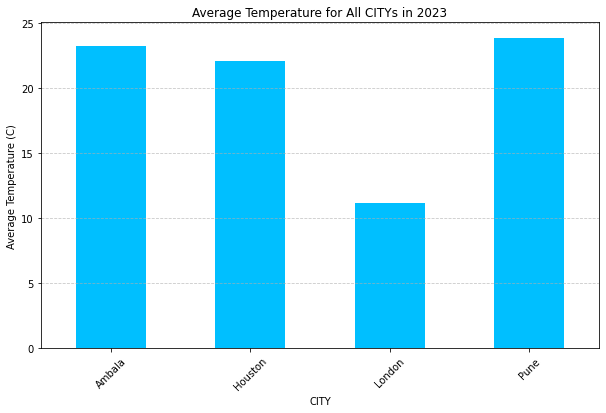

In [33]:

# Filter the grouped data for the year 2023
grouped_data_2023 = grouped_data.filter(lambda x: pd.to_datetime(x['Date']).dt.year.iloc[0] ==  2023)

# Calculate the mean temperature for each CITY in 2021
mean_temp_2023 = grouped_data_2023.groupby('CITY')['T2M'].mean()

# Plot the mean temperature for all four CITYs
plt.figure(figsize=(10, 6))
mean_temp_2023.plot(kind='bar', color='deepskyblue')
plt.title('Average Temperature for All CITYs in 2023')
plt.xlabel('CITY')
plt.ylabel('Average Temperature (C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
# Filter the grouped data for the years 2021, 2022, and 2023
# grouped_data_2021_2023 = grouped_data.filter(lambda x: x['Year'].iloc[0] in [2021, 2022, 2023])
grouped_data_2021_2023 = grouped_data.filter(lambda x: pd.to_datetime(x['Date']).dt.year.iloc[0] in [2021, 2022, 2023])

In [ ]:
# 

<Figure size 720x432 with 0 Axes>

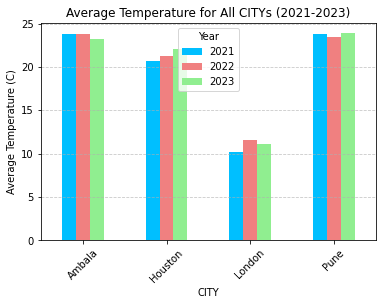

In [34]:
# Calculate the mean temperature for each CITY for the years 2021, 2022, and 2023
# mean_temp_2021_2023 = grouped_data_2021_2023.groupby(['CITY', 'Year'])['T2M'].mean()
mean_temp_2021_2023 = grouped_data['T2M'].mean()

# Plot the mean temperature for all CITYs for the years 2021, 2022, and 2023
plt.figure(figsize=(10, 6))
mean_temp_2021_2023.unstack().plot(kind='bar', color=['deepskyblue', 'lightcoral', 'lightgreen'])
plt.title('Average Temperature for All CITYs (2021-2023)')
plt.xlabel('CITY')
plt.ylabel('Average Temperature (C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.show()


<Figure size 720x432 with 0 Axes>

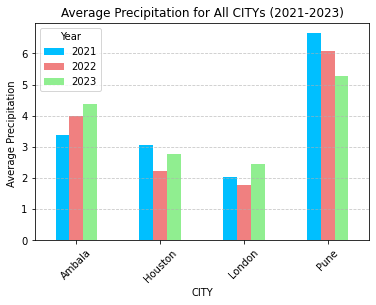

In [36]:
# grouped_data_2021_2023 = grouped_data.filter(lambda x: x['Year'].iloc[0] in [2021, 2022, 2023])

# Calculate the mean Precipitation for each CITY for the years 2021, 2022, and 2023
# mean_temp_2021_2023 = grouped_data_2021_2023.groupby(['CITY', 'Year'])['Precipitation'].mean()
mean_precpitation_2021_2023 = grouped_data['Precipitation'].mean()

# Plot the mean Precipitation for all CITYs for the years 2021, 2022, and 2023
plt.figure(figsize=(10, 6))
mean_precpitation_2021_2023.unstack().plot(kind='bar', color=['deepskyblue', 'lightcoral', 'lightgreen'])
plt.title('Average Precipitation for All CITYs (2021-2023)')
plt.xlabel('CITY')
plt.ylabel('Average Precipitation ')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.show()


<Figure size 720x432 with 0 Axes>

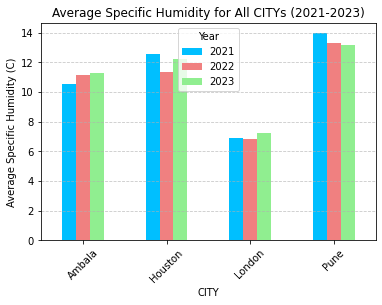

In [38]:
# Calculate the mean Specific Humidity for each CITY for the years 2021, 2022, and 2023
mean_SpecificHumidity_2021_2023= grouped_data['SH2M'].mean()

# Plot the mean Precipitation for all CITYs for the years 2021, 2022, and 2023
plt.figure(figsize=(10, 6))
mean_SpecificHumidity_2021_2023.unstack().plot(kind='bar', color=['deepskyblue', 'lightcoral', 'lightgreen'])
plt.title('Average Specific Humidity for All CITYs (2021-2023)')
plt.xlabel('CITY')
plt.ylabel('Average Specific Humidity (C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.show()




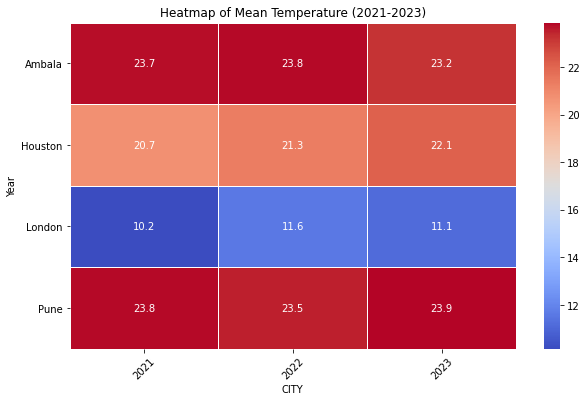

In [39]:

# Pivot the data to create a matrix where rows represent years and columns represent CITYs
pivot_data = mean_temp_2021_2023.unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Mean Temperature (2021-2023)')
plt.xlabel('CITY')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


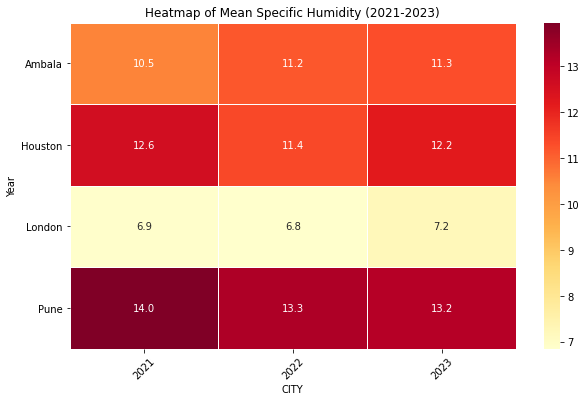

In [42]:

# Pivot the data to create a matrix where rows represent years and columns represent CITYs
# mean_sh2m = grouped_data_2021_2023.groupby(['CITY', 'Year'])['SH2M'].mean()
pivot_data_sh2m = mean_SpecificHumidity_2021_2023.unstack()

# Plot the heatmap for specific humidity
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data_sh2m, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Mean Specific Humidity (2021-2023)')
plt.xlabel('CITY')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


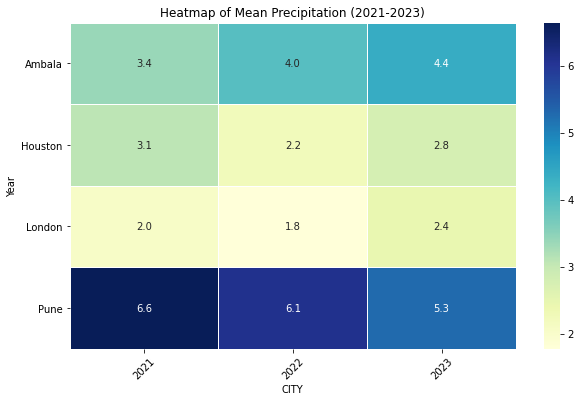

In [41]:
# Pivot the data to create a matrix where rows represent years and columns represent CITYs
# mean_precipitation = grouped_data_2021_2023.groupby(['CITY', 'Year'])['Precipitation'].mean()
pivot_data_precipitation = mean_precpitation_2021_2023 .unstack()

# Plot the heatmap for precipitation
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data_precipitation, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Mean Precipitation (2021-2023)')
plt.xlabel('CITY')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


<Figure size 720x432 with 0 Axes>

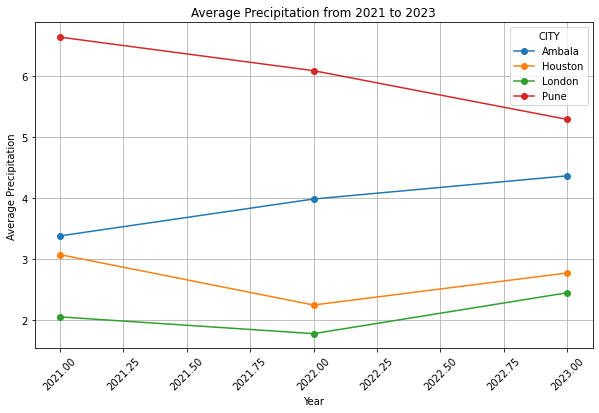

In [50]:
# Plot the line graph for precipitation
mean_precipitation = grouped_data['Precipitation'].mean()
pivot_data_precipitation = mean_precipitation.unstack()

plt.figure(figsize=(10, 6))
pivot_data_precipitation.T.plot(marker='o', figsize=(10, 6))
plt.title('Average Precipitation from 2021 to 2023')
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='CITY')
plt.show()


<Figure size 720x432 with 0 Axes>

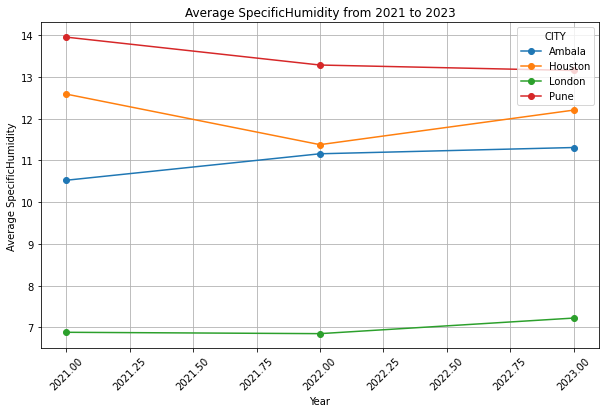

In [52]:

mean_SpecificHumidity_2021_2023= grouped_data['SH2M'].mean()
pivot_data_SpecificHumidity= mean_SpecificHumidity_2021_2023.unstack()

plt.figure(figsize=(10, 6))
pivot_data_SpecificHumidity.T.plot(marker='o', figsize=(10, 6))
plt.title('Average SpecificHumidity from 2021 to 2023')
plt.xlabel('Year')
plt.ylabel('Average SpecificHumidity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='CITY')
plt.show()


<Figure size 720x432 with 0 Axes>

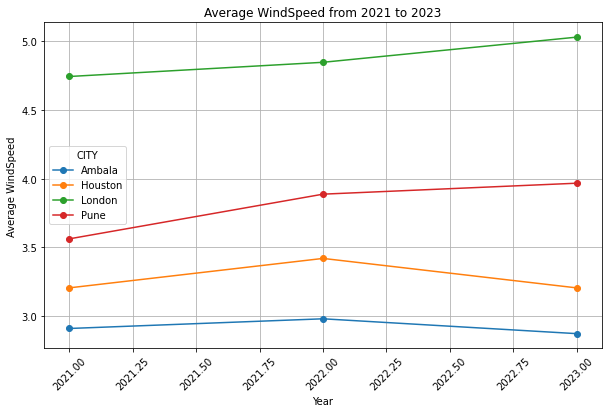

In [55]:
mean_WindSpeed_2021_2023= grouped_data['WS10M'].mean()
pivot_data_WindSpeed= mean_WindSpeed_2021_2023.unstack()

plt.figure(figsize=(10, 6))
pivot_data_WindSpeed.T.plot(marker='o', figsize=(10, 6))
plt.title('Average WindSpeed from 2021 to 2023')
plt.xlabel('Year')
plt.ylabel('Average WindSpeed')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='CITY')
plt.show()


## Monthly Analysis

In [44]:
data

,CITY,SH2M,Precipitation,T2M,T2M_MAX,T2M_MIN,SP,WS10M,Date
0,Houston,4.21,0.01,6.12,12.09,2.48,101.01,4.23,2021-01-01
1,Houston,4.39,0.00,6.72,13.69,1.30,101.63,2.86,2021-01-02
2,Houston,5.92,0.00,9.64,18.37,2.63,101.38,3.39,2021-01-03
3,Houston,7.51,0.01,13.35,21.73,6.75,101.26,2.42,2021-01-04
4,Houston,6.65,0.01,12.09,19.99,5.85,101.36,3.15,2021-01-05
...,...,...,...,...,...,...,...,...,...
4375,Ambala,3.30,0.00,15.30,23.49,11.05,97.08,1.72,2023-12-27
4376,Ambala,3.91,0.00,15.38,24.13,10.16,96.93,1.69,2023-12-28
4377,Ambala,4.46,0.00,15.08,23.62,10.33,97.02,1.92,2023-12-29
4378,Ambala,5.19,0.00,14.46,21.37,10.61,96.89,1.70,2023-12-30


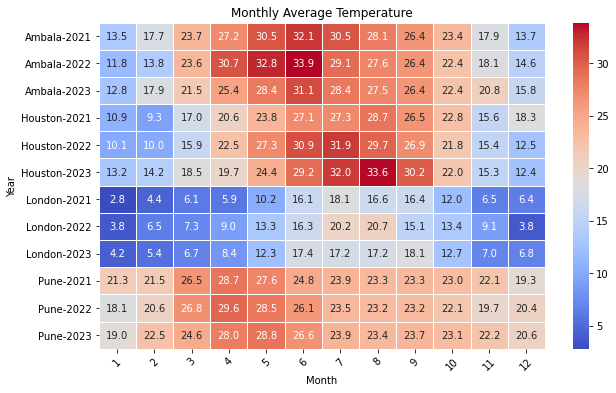

In [57]:


# Convert 'Date' column to datetime type
# data['Date'] = pd.to_datetime(data['Date'])

# Group the data by CITY, year, and month
grouped_data_monthly = data.groupby(['CITY', data['Date'].dt.year, data['Date'].dt.month])

# Calculate mean temperature for each group
mean_temp_monthly = grouped_data_monthly['T2M'].mean()

# Pivot the data to create a matrix where rows represent years, columns represent months, and values represent mean temperature
pivot_data_monthly = mean_temp_monthly.unstack()

# Plot the heatmap for mean temperature
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data_monthly, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


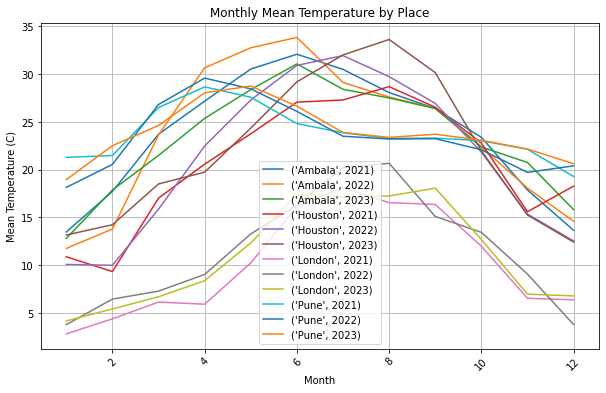

In [59]:

# Plot the line map for mean temperature
plt.figure(figsize=(10, 6))

# Plot a line for each place
for place in pivot_data_monthly.index:
    plt.plot(pivot_data_monthly.columns, pivot_data_monthly.loc[place], label=place)

# Set plot title and labels
plt.title('Monthly Mean Temperature by Place')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


<Figure size 720x432 with 0 Axes>

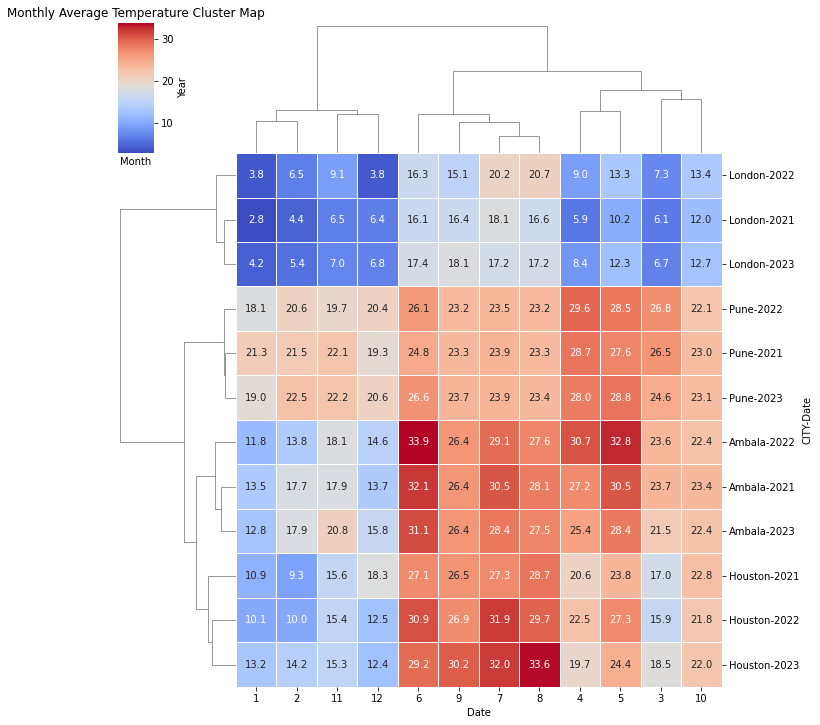

In [46]:
# Plot the clustermap for mean temperature
plt.figure(figsize=(10, 6))
sns.clustermap(pivot_data_monthly, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Monthly Average Temperature Cluster Map')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


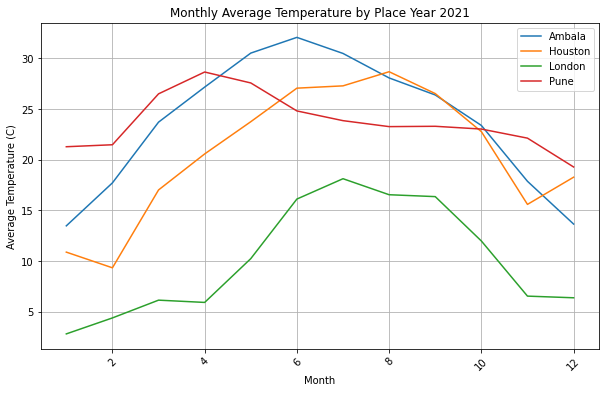

In [85]:
data_2021 = pivot_data_monthly.xs(2021, level='Date')
# Plot the line map for mean temperature
plt.figure(figsize=(10, 6))

# Plot a line for each place
for place in data_2021.index:
    plt.plot(data_2021.columns, data_2021.loc[place], label=place)

# Set plot title and labels
plt.title('Monthly Average Temperature by Place Year 2021')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


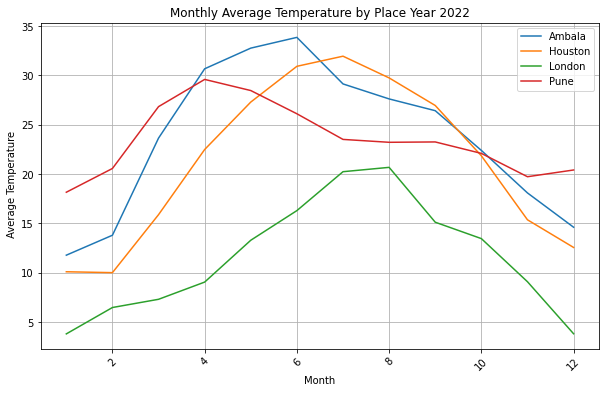

In [86]:
data_2022 = pivot_data_monthly.xs(2022, level='Date')
# Plot the line map for mean temperature
plt.figure(figsize=(10, 6))

# Plot a line for each place
for place in data_2022.index:
    plt.plot(data_2022.columns, data_2022.loc[place], label=place)

# Set plot title and labels
plt.title('Monthly Average Temperature by Place Year 2022')
plt.xlabel('Month')
plt.ylabel(' Average Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


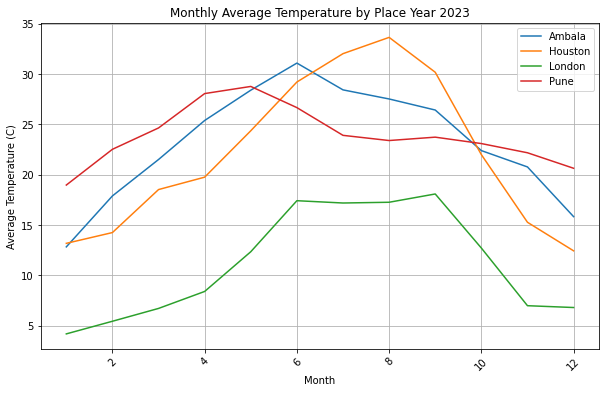

In [87]:
data_2023 = pivot_data_monthly.xs(2023, level='Date')
# Plot the line map for mean temperature
plt.figure(figsize=(10, 6))

# Plot a line for each place
for place in data_2023.index:
    plt.plot(data_2023.columns, data_2023.loc[place], label=place)

# Set plot title and labels
plt.title('Monthly Average Temperature by Place Year 2023')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [77]:
# Group the data by CITY, year, and month
grouped_data_2 = data.groupby(['CITY', data['Date'].dt.year, data['Date'].dt.month])

# Calculate the maximum temperature for each group
max_temp_monthly = grouped_data_2['T2M'].max()

# Find the index of the maximum temperature within each group
max_temp_month_idx = max_temp_monthly.groupby(['CITY', 'Date']).idxmax()

# Extract the month from the index to get the month with the maximum temperature
max_temp_month = max_temp_month_idx.apply(lambda x: x[2])

# Optionally, create a new DataFrame or Series to store the results
max_temp_month_df = max_temp_month.unstack(level='CITY')


In [78]:
max_temp_month_df 

CITY,Ambala,Houston,London,Pune
Date,,,,
2021,6,8,7,4
2022,6,7,7,4
2023,6,8,9,4


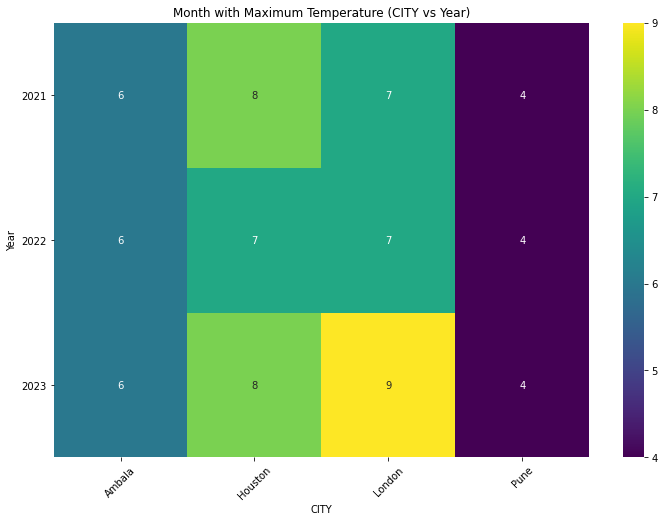

In [83]:

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(max_temp_month_df, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Month with Maximum Temperature (CITY vs Year)')
plt.xlabel('CITY')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [89]:
# Group the data by CITY, year, and month
grouped_data_2 = data.groupby(['CITY', data['Date'].dt.year, data['Date'].dt.month])

# Calculate the maximum temperature for each group
max_Precipitation_monthly = grouped_data_2['Precipitation'].max()

# Find the index of the maximum temperature within each group
max_Precipitation_month_idx = max_Precipitation_monthly.groupby(['CITY', 'Date']).idxmax()

# Extract the month from the index to get the month with the maximum temperature
max_Precipitation_month = max_Precipitation_month_idx.apply(lambda x: x[2])

# Optionally, create a new DataFrame or Series to store the results
max_Precipitation_month_df = max_Precipitation_month.unstack(level='CITY')


In [90]:
max_Precipitation_month_df

CITY,Ambala,Houston,London,Pune
Date,,,,
2021,7,4,10,5
2022,7,12,11,7
2023,7,11,11,7


In [91]:
# Group the data by CITY, year, and month
grouped_data_2 = data.groupby(['CITY', data['Date'].dt.year, data['Date'].dt.month])

# Calculate the maximum temperature for each group
max_SH2M_monthly = grouped_data_2['SH2M'].max()

# Find the index of the maximum temperature within each group
max_SH2M_month_idx = max_SH2M_monthly.groupby(['CITY', 'Date']).idxmax()

# Extract the month from the index to get the month with the maximum temperature
max_SH2M_month = max_SH2M_month_idx.apply(lambda x: x[2])

# Optionally, create a new DataFrame or Series to store the results
max_SH2M_month_df = max_SH2M_month.unstack(level='CITY')


In [92]:
max_SH2M_month_df

CITY,Ambala,Houston,London,Pune
Date,,,,
2021,7,8,7,6
2022,7,8,8,8
2023,7,10,9,7
